1. What is the fundamental idea behind support vector machines?
- SVMs can be used to 1) classify or 2) regress data. If SVMs are used for classification, the idea is to find the line(s) or curve(s) that splits the data into correct classes while maintaining the maximum distance from the closest member of each class. SVMs are also used for regression so that the goal is to get as many points into the "road" defined by the line so that the road's width is \epsilon to each side of the line.

2. What is a support vector?
- All data points on the street or on its border are called support vectors. The support vectors are the only data points that have an influence on the street.

3. Why is it important to scale the inputs when using SVMs?
- SVMs try to fit as wide a street as possible and if the features are of widely different scales, the SVM will tend to almost ignore features with small scales.

4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
- You can get confidence scores by calculating the distance to the class separator. A probability can be squeezed out by using some tricks with linear regression.

5. How can you choose between LinearSVC, SVC, and SGDClassifier?
- LinearSVC can be pretty quick for linear SVMs, but SDGClassifier is pretty similar in speed and allows for minibatch training. SVC supports the kernel trick (still not sure what the trick is) which allows for non-linear SVMs.

6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?
- Gamma is the narrowness of the distribution so if you're underfitting you should increase gamma to make the model more strict in its classifying. By increasing C, you can make the classes more defined so try increasing that as well.

7. What does it mean for a model to be ϵ-insensitive?
- It means that data points inside the street (ϵ away from the fitted line) have no impact to the model.

8. What is the point of using the kernel trick?
- To capture non linear phenomena without having to transform features into higher dimension features.

9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [1]:
# data from the book
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

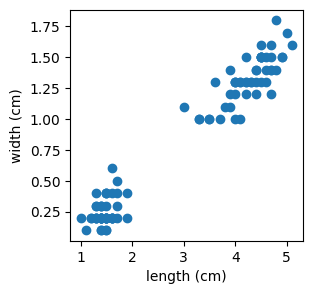

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1])
plt.ylabel("width (cm)")
plt.xlabel("length (cm)")
plt.show()

In [6]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

linearsvc_clf = make_pipeline(StandardScaler(), LinearSVC(C=10, loss="hinge", random_state=1))
linearsvc_clf.fit(X, y)

svc_clf = make_pipeline(StandardScaler(), SVC(C=10, kernel="linear", random_state=1))
svc_clf.fit(X, y)

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(alpha=0.02, random_state=1))
sgd_clf.fit(X, y)

print("linearsvc_clf    ", (np.round(linearsvc_clf[1].coef_[0], 3), round(linearsvc_clf[1].intercept_[0], 3)))
print("svc_clf          ", (np.round(svc_clf[1].coef_[0], 3), round(svc_clf[1].intercept_[0], 3)))
print("sgd_clf          ", (np.round(sgd_clf[1].coef_[0], 3), round(sgd_clf[1].intercept_[0], 3)))

linearsvc_clf     (array([1.054, 1.099]), np.float64(0.285))
svc_clf           (array([1.12 , 1.026]), np.float64(0.319))
sgd_clf           (array([1.043, 0.966]), np.float64(0.339))


10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

In [39]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=1)

In [40]:
print(X_train.shape)
X_train.head(3)

(133, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0


In [41]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc_clf = make_pipeline(StandardScaler(), SVC(C=10, random_state=1))
svc_clf.fit(X_train, y_train)

X_train_preds = svc_clf.predict(X_train)
print("Training accuracy: ", np.mean(X_train_preds == y_train)*100)

X_test_preds = svc_clf.predict(X_test)
print("Testing accuracy: ", round(np.mean(X_test_preds == y_test)*100, 2))


Training accuracy:  100.0
Testing accuracy:  97.78


11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE?

In [47]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing(as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=1)
X_train.shape, y_train.shape

((16512, 8), (16512,))

In [55]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import loguniform, uniform

svr_clf = make_pipeline(StandardScaler(), SVR())

# randomized search with cross validation to find the best model
param_distrib = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svr_clf, param_distributions=param_distrib,
                                   n_iter=100, cv=3, random_state=1)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                 scoring="neg_root_mean_squared_error")


array([0.5805409 , 0.56423034, 0.58381307, 0.56570322, 0.59015281])

In [62]:
best_srv = rnd_search_cv.best_estimator_
X_train_preds = best_srv.predict(X_train)
print("Training RMSE: ", np.round(np.sqrt(np.mean((X_train_preds - y_train) ** 2))*1e5))

Training RMSE:  56866.0
